In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [4]:
os.chdir("C:/Users/Dima/Desktop/DataScience/Shad_Python_02_2/1_beverage/")


In [5]:
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')

In [6]:
print(df.shape)
print(len(df))

(34, 8)
34


In [13]:
df.head()


,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0



Для кластеризации методом k-means необходимо задать k наперед. Попробуем k=2

In [14]:
from sklearn.cluster import KMeans
# Инициализация модели
model=KMeans(n_clusters=2, random_state=42)
# random_state - зерно датчика случайных чисел.
# При каждом новом вызове с одинаковыми random_state


In [15]:
# подгонка модели по данным из df
# max_iter=300 означает что мы допускаем 300 смен положения центров кластера.
# random_state - зерно датчика случайных чисел.
# n_init=10 сколько раз проводится кластеризация (разные расположения центров кластера)
# tol=0.0001 прерывает, когда передвижение кластера <0,0001
# verbose=0 выдает сообщение на каком этапе находится процесс
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
# Номер кластера, которому принадлежит объект
model.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [17]:
# Координаты уентров кластеров
model.cluster_centers_

array([[ 9.52380952e-01,  2.38095238e-01,  4.76190476e-02,
        -8.32667268e-17,  7.61904762e-01,  4.28571429e-01,
         4.76190476e-02,  3.80952381e-01],
       [ 1.11022302e-16,  9.23076923e-01,  5.38461538e-01,
         5.38461538e-01, -5.55111512e-17,  1.53846154e-01,
         7.69230769e-01,  7.69230769e-02]])

In [20]:
# предсказание для новых наблюдений. Метод predict
new_items = [
    [1,1,1,1,1,1,1,1],
    [0,0,0,0,0,0,0,0]
]
model.predict(new_items)

array([1, 0])

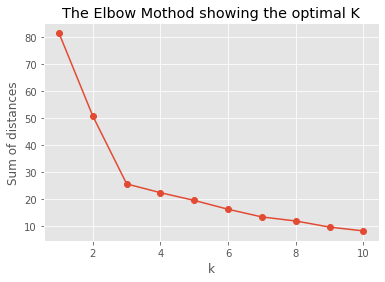

In [76]:
K=range(1,11)

models=[KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist=[model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Mothod showing the optimal K')
plt.show()


In [67]:
model=KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster']=model.labels_
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545
1,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
2,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333


In [68]:
df.groupby('cluster').size()

cluster
0    11
1    11
2    12
dtype: int64